<style type="text/css">
div.text_cell_render h1 {  
    font-size: 24pt; }

div.text_cell_render h2 {  
    font-size: 18pt; }

div.text_cell_render h3 {  
    font-size: 14pt; }

.rendered_html pre,
.rendered_html code {
    font-size: medium; }

.rendered_html ol {
    list-style:decimal;
    margin: 1em 2em; }    
    
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top} </style>

<table class="tg" align="right">
  <tr>
    <th class="tg-0pky"> <b>Author:</b> </th>
    <th class="tg-0pky"> Cesare Pio Iurlaro <br> (<a href="cesareiurlaro@gmail.com">cesareiurlaro@gmail.com</a>)  </th>
  </tr>
  <tr>
    <th class="tg-0pky"> <b>URLs:</b> </th>
    <th class="tg-0pky"> - <a href="https://github.com/CesareIurlaro">GitHub.com </a> <br>
                         - <a href="https://www.linkedin.com/in/cesare-iurlaro">Linkedin.com </a></th></tr>
</table> 

<hr>

# Elementi di elaborazione automatica del linguaggio naturale <br> Esercizio #2 [2018/2019]

<hr>

## 1. Traccia 
L'esercizio consiste nell'implementazione di un semplice **traduttore transfer** **IT $\rightarrow$ IT**-**YO**, ovvero di un _sistema di traduzione_ che prenda in _input_ una frase scritta in italiano e che restituisca in _output_ la corrispondente traduzione in 'italiano-yoda', lingua fittizia parlata nell'universo cinematografico della saga di Guerre Stellari.


La **parsificazione** è vincolata all'utilizzo dell'**_algoritmo CKY_**, algoritmo per _grammatiche libere dal contesto_ (_CFG_) che sfrutta il metodo di **_programmazione dinamica_** e una strategia **_bottom-up_** per svolgere il _task_ con una _complessità nel caso peggiore_ di $\mathcal{O}\left(n^{3} \cdot|G|\right)$, dove $n$ è la _lunghezza_ della stringa da parsificare e $|G|$ la cardinalità della grammatica $G$.

Di seguito sono elencati alcuni esempi di traduzioni che ci si aspetta che il traduttore sia in grado di eseguire correttamente:


<table class="tg">
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky"><b>Input</b></th>
    <th class="tg-0pky"><b>Output atteso</b></th>
  </tr>
  <tr>
    <th class="tg-0pky">$(a)$</th>
    <th class="tg-0pky">Tu avrai novecento anni di età</th>
    <th class="tg-0pky">Novecento anni di età tu avrai</th>
  </tr>
  <tr>
    <th class="tg-0pky">$(b)$</th>
    <th class="tg-0pky">Tu hai amici lì</th>
    <th class="tg-0pky">Amici hai tu lì</th>
  </tr>
  <tr>
    <th class="tg-0pky">$(c)$</th>
    <th class="tg-0pky">Noi siamo illuminati</th>
    <th class="tg-0pky">Illuminati noi siamo</th>
  </tr>
  <tr>
    <th class="tg-0pky">$(d)$</th>
    <th class="tg-0pky">Tu hai molto molto da apprendere ancora</th>
    <th class="tg-0pky">Molto da apprendere ancora tu hai</th>
  </tr>
  <tr>
    <th class="tg-0pky">$(e)$</th>
    <th class="tg-0pky">Il futuro di questo ragazzo è nebuloso</th>
    <th class="tg-0pky">Nebuloso il futuro di questo ragazzo è</th>
  </tr>
  <tr>
    <th class="tg-0pky">$(f)$</th>
    <th class="tg-0pky">Skywalker corre veloce</th>
    <th class="tg-0pky">Veloce Skywalker corre</th>
  </tr>
    
</table>

### 1.1 Osservazioni preliminari

#### 1.1.1 Schemi linguistici di Yoda
Yoda è un personaggio immaginario della saga fantascientifica di Guerre stellari. 
I suoi **caratteristici schemi linguistici** sono stati oggetto di discussione in tipologia linguistica; gli accademici sintattici li hanno infatti associati ad un **ordine di sintassi realmente adottato da alcuni linguaggi naturali: l'ordine Oggetto-Soggetto-Verbo** (**OSV**).

Quest'ultimo viene anche detto **XSV**, dove **X** rappresenta un qualsivoglia complemento, eventualmente anche non oggetto, che si coordini appropriatamente con il verbo.
<hr>
> $A$ $long$ $time$ $ago,$ $in$ $a$ $galaxy$ $far$ $far$ $away$ $...$ 
> ![Alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLYrmOHFvYMRgYBpwMyVffZHZ0Os33YNoxEiR9rzKDDuRNyYQY)

Esempi di altre lingue che fanno uso di questo ordine sono le lingue _haida_ e _kotava_.

#### 1.1.2 Regole per la traduzione
Sebbene associato ad un _ordine OSV_, il linguaggio usato da Yoda **non ha un comportamento sempre riconducibile a uno schema fisso**. Ciò significa che una regola di traduzione potrebbe essere corretta per una o più sue citazioni, ma anche che potrebbe non esserlo per altre aventi la stessa struttura sintattica.

È possibile constatare questa irregolarità anche tramite l'**osservazione degli esempi**:
1. L'**anteposizione degli aggettivi e dei sintagmi aggettivali** avviene negli esempi in cui compaiono $(a)$ $(d)$ $(e)$ $(f)$
2. L'**anteposizione degli avverbi e dei sintagmi avverbiali** invece avviene sono nell'esempio $(d)$ e non in $(b)$
2. L'**inversione di pronome e verbo** è infine presente solo nell'esempio $(b)$

Ciò è stato tenuto presente durante la _fase di progettazione_.

**Osservazione:** l'esempio $(f)$ presenta un errore grammaticale. `veloce` infatti è un aggettivo che rende la frase, che per essere corretta necessiterebbe di un avverbio, **non grammaticale**. 
Nell'implementazione tale frase è stata corretta sostituendo `velocemente` a `veloce`.

<hr>

## 2. Realizzazione

### 2.1 Requisiti:
1. **Acquisizione di una grammatica** sufficientemente espressiva da coprire almeno il dominio di esempi precedentemente enumerati
2. **Implementazione** di **CKY** che generi alberi sintattici avvalendosi di meccanismi di *backtracing*
3. Manipolazione efficiente dei dati al fine di ottenere una **traduzione accurata dell'_input_**

<hr>

### 2.2 Grammatica
Nella scrittura della grammatica sono state catturate solamente alcune tra le più significative **strutture** della lingua italiana . 

#### Sintagmi (regole grammaticali) modellati:
- Sintagmi _nominali_ (**NP**)
- Sintagmi _verbali_ (**VP**)
- Sintagmi _aggettivali_ (**ADJP**)
- Sintagmi _avverbiali_ (**ADVP**)
- Sintagmi _preposizionali_ (**PP**)

#### Unità sintattiche modellate:
- _Pronomi personali_ e _nomi propri_ (**NP**)
- _Nomi_ non propri (**NOUN**)
- _Pronomi_ non personali (**PRON**)
- _Verbi_ non usati come ausiliari (**VERB**)
- _Verbi_ usati come _ausiliari_ (**AUX**)
- _Verbi_ composti usati con un _ausiliare_ (**VBN**)
- _Articoli_ (**DET**)
- _Avverbi_ (**ADV**)
- _Preposizioni_ (**ADP**)
- _Aggettivi_ (**ADJ**)

<hr>


### 2.3 Architettura

#### Piattaforma
**_Nltk_** è una _suite di librerie_ che mette a disposizione classi e metodi per la gestione di alberi sintattici e grammatiche.

Scritta in in **_python_**, è il punto di riferimento per l'elaborazione del linguaggio naturale _open source_ e si è perciò dimostrata una **solida scelta**.

#### Moduli:
- `_init_`, responsabile dell'inizializzazione dei **_dati di configurazione_**:    
    
    - `data_folder` e `data_file` sono i **riferimenti sul filesystem** rispettivamente alla _cartella delle grammatiche_ e ad una _specifica grammatica_
    -  `sentences` è una lista di **stringhe di _input_** (_frasi_) da sottoporre al traduttore
    -  `translation_rules`  è una lista di `Nonterminal`; **il traduttore la utilizza per trasformare l'albero sintattico** in fase di traduzione
    
    
- `_logic_`, resposabile della **_logica applicativa_** .

    - Composto da due funzioni, `cky_parsing` e `translate`, **determina le funzionalità dell'applicazione** eseguendo elaborazioni dettagliate
    

- `_main_`, responsabile dell'**_avvio del programma_**.

    - Richiama entrambi i moduli precedentemente descritti. 

<hr>



#### 2.3.1 Descrizione di `cky_parsing`
Implementa l'**algoritmo di parsificazione CKY**.
- _input_: lista di parole `words`, Context-Free-Grammar `grammar` e parametro opzionale booleano `draw `.
- _output_: albero sintattico le cui foglie sono componenti di `words` e il cui nodo padre è il POS tag che l'algoritmo ha associato loro
<table class="tg" align="left">
<tr> <th class="tg-0pky"> Il <b><i>POS tag</i></b> è il mezzo con cui è possibile effettuare elaborazione del linguaggio naturale. <br> Consiste in una sequenza di caratteri che <b>identifica</b> un insieme elementi sintattici simili tra loro, e <b>distingue</b> quelli che invece non lo sono. </th> </tr> </table>

L'algoritmo costruisce una **matrice `table`**, di tipo `ndarray`. Ciascuna **componente** di tale matrice è una **lista di alberi sintattici** potenzialmente vuota. La presenza di **un albero sintattico certifica la corrispondenza tra una produzione della grammatica e la frase di input**.

Questa implementazione **determina se una sequenza di parole $S$ è coperta da una grammatica $G$**:

- se la **componente** di `table` **$[0,\ n-1]$** è una **lista vuota**, allora vuol dire che **non esiste un albero sintattico** di $S$ in accordo a $G$.
 <br> In tal caso l'**algoritmo restituisce un albero la cui radice presenta l'etichetta "`Grammar error`"**.
 
 **Osservazione:** ciò avviene anche se `grammar` non è espressa in **_Chomsky Normal Form_**
<table class="tg" align="left">
<tr> <th class="tg-0pky"> <b><i>Chomsky Normal Form:</i></b> forma normale in cui l’<i>RHS</i> di ogni regola possiede due simboli non terminali oppure un singolo simbolo terminale. </th> </tr> </table>


- se altrimenti tale **componente** è una **lista non vuota**, allora vuol dire che $G$ copre $S$ ed inoltre
    - se contiene **un solo elemento**, l'**interpretazione** di $S$ è **univoca**
    - se viceversa contiene **più di un elemento**, vi sono più interpretazioni di $S$ e quindi vi è **ambiguità**
  <br> 
  
  In tal caso l'**algoritmo restituisce il primo albero** presente nella lista, ignorando così l'ambiguità. <br> Se `draw` ha valore **True**, allora tale albero viene anche disegnato a schermo.

In [ ]:
def cky_parsing(words: list, grammar: CFG, draw=False):
        n = len(words) + 1
        table = numpy.ndarray(shape=(n,n), dtype=set)

        for j in range(1, n):                                                           
            table[j-1, j] = list(map(lambda rule: Tree(rule.lhs(), [words[j-1]]),      
                                list(filter(lambda production: len(production.rhs()) == 1
                                                                  and production.rhs()[0] == words[j-1],
                                                               grammar.productions()))))

            for i in reversed(range(0, j-1)):
                for k in range(i+1, j):                         
                    rule = list(map(lambda rule: Tree(rule.lhs(), [table[i, k][0], table[k, j][0]]),
                        list(filter(lambda production: len(production.rhs()) == 2
                           and table[i, k] is not None and production.rhs()[0] in map(lambda head: head.label(), table[i, k])
                           and table[k, j] is not None and production.rhs()[1] in map(lambda head: head.label(), table[k, j]),
                        grammar.productions()))))
                    table[i, j] = rule if table[i, j] is None else rule + table[i, j]
                    
        if draw: table[0, n - 1][0].draw()
        return table[0, n-1][0] if len(table[0, n-1]) != 0 else Tree("Grammar error", []) 

<hr>

#### 2.3.2 Descrizione di `translate`
Implementazione della **fase di traduzione** del programma.
- _input_: albero sintattico `tree` della frase da tradurre, lista di non terminali `translation_rules` e parametro opzionale booleano `draw `.
- _output_: manipolazione dell'albero `tree` di partenza; rappresenta la traduzione effettuata

Questa funzione effettua in `tree` una **ricerca in profondità in preordine** di un oggetto di classe `Nonterminal` (POS tag o sintagma che sia) presente nella lista `translation_rules`. Se la ricerca ha successo, **antepone tale oggetto** (`put_left`) **al resto della frase** attraverso la manipolazione dell'albero di partenza.

 Se `draw` ha valore **True**, allora l'albero così manipolato viene anche disegnato a schermo. La **funzione restituisce l'albero manipolato**, ovvero quello su cui è stata effettuata la traduzione, la cui radice presenta l'etichetta "`S'`".
 
 
 **Osservazione:** l'albero in _output_ è stato volutamente mantenuto binario.

In [ ]:
def translate(tree: Tree, translation_rules: list, draw=False):
    put_left = list(filter(lambda i: isinstance(tree[i], Tree)
                                          and tree[i].label() in translation_rules
                                          and not 'put_left' in locals(),
                                tree.treepositions()))[0] if len(tree) != 0 else []

    if len(put_left) != 0:
        prefix = tree.__getitem__(put_left)
        tree.__delitem__(put_left)
        tree = Tree(Nonterminal("S'"), [prefix, tree])
        if draw: tree.draw()

    return tree

<hr>

### 2.4 Note sull'implementazione
Il sistema fa ampio uso di **funzioni anonime** (o **funzioni lambda**), caratterizzate dall'assenza di un identificatore. Tali funzioni godono della caratteristica di essere **componibili**, ossia autonome e senza stato. 
Ciò rende possibile la **composizione di funzioni**, ovvero l'utilizzo di funzioni come parametri di altre funzioni.

Lo stile di programmazione che fa uso di questa caratteristica viene chiamato **programmazione funzionale** ed è basato su un paradigma di tipo _dichiarativo_ anziché _procedurale_; **_python_** lo supporta.


**Vantaggi principali di questo approccio:** 
- _Maggiore facilità di lettura e manutenibilità_, ogni funzione è progettata per realizzare un'attività specifica con gli argomenti assegnati. La funzione non si basa su alcuno stato esterno.
- _Sviluppo iterativo più semplice_, in quanto è più agevole eseguire il refactoring del codice ed è più facile implementare le modifiche di progettazione.
- _Procedure più semplici di test e debug_, le funzioni anonime possono essere più facilmente testate in isolamento ed è possibile scrivere codice di test che le chiama con valori tipici, casi limite validi e casi limite non validi.
- <a href="https://leadsift.com/loop-map-list-comprehension/"><i>Migliori prestazioni</i></a>


<hr>

## 3. Conclusione

### 3.1 Considerazioni

#### 3.1.1 Correttezza

Il programma si comporta come atteso nella maggior parte dei casi, ma non in tutti.

Le incongruenze presenti all'interno delle citazioni stesse di cui si è parlato precedentemente, non permettono infatti di stabilire delle regole di traduzione generali al punto da permettere al traduttore di comportarsi ottimamente per tutti i possibili _input_.

Con riferimento agli esempi, in particolare, il traduttore ottiene sempre l'esatto **output atteso**, tranne che per l'esempio $(b)$; che però si comporta in modo anomalo per ben 2 delle 3 regole catturate per la traduzione nel linguaggio Yoda e pertanto richiederebbe delle _regole ad hoc_.

Viene di seguito riportata la traduzione del <a href="http://www.yodaspeak.co.uk/index.php">Yoda speak generator</a>: <br>

<p align="center"><img src="https://i.ibb.co/dtpL47B/yoda.png"/></p>

<br>

La quale **non coincide** con l'output atteso e prova la duplice problematicità sia dell'esempio in questione che della generalizzazione della traduzione nel linguaggio Yoda.


#### 3.1.2 Paradigma di traduzione automatica adottato

Il paradigma di traduzione adottato dal sistema prende il nome di paradigma **transfer**. 

Per effettuare cioè la traduzione effettua le seguenti iterazioni:
- _**Analizza**_ la struttura sintattica dell'_input_, cioè la **parsifica** e ne **valuta i _POS tag_**; nel sistema implementato ciò corrisponde all'esecuzione dell'_algoritmo CKY_
- _**Trasferisce**_ la struttura analizzata, ovvero effettua una prima **traduzione**; nel sistema implementato ciò non è necessario in quanto le parole non cambiano tra i due idiomi
- _**Sintetizza**_ la frase in _output_ attraverso l'utilizzo di regole; nel sistema implementato tali regole decidono l'**ordine** dei sintagmi 

### 3.2 Esempi di traduzione

<p><b>Input</b></p> | <p><b>Output reale</b></p>
- | - 
<img src="https://i.ibb.co/ZY0D1mn/S.png"/> | <img src="https://i.ibb.co/RYsLQfp/S.png"/>
<img src="https://i.ibb.co/qWqKCYN/S.png"/> | <img src="https://i.ibb.co/ns3K8mJ/S.png"/>
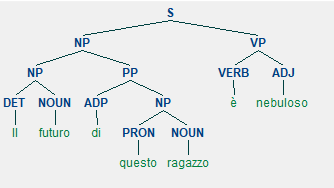
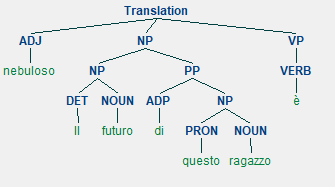